# Least squares fit using harmonic functions 

In this project, we are attempting to produce a least squares regression of measured temperature data using harmonic (trigonometric) functions. Due to the innate periodicity of the data set, regression models using harmonic functions would work well. Here, we use the following 9-parameter circular function:

\begin{equation*}
f(x)   = a_0 + \sum_{k=1}^4 (a_k cos(\frac{2 \pi k d} {365.25}) + b_k sin( \frac{2 \pi k d} {365.25}))
\end{equation*}


## Dataset loading and cleansing

Dataset: Minimum and maximum temperatures measured at Edmonton International Airport between 1963 and 1993. The data is structured in a way where the date is logged in columns containing the year, month, and day. Each month in this dataset contains a total of 31 days where every invalid date (e.g. February 29-31) is marked with a temperature value of 99. These are immediately removed using conditional indexing. 

In addition, since we want to fit the model as a function of day of the year, we will need to convert the Julian calendar dates to a 'day of the year' format. 

In [2]:
%plot inline -w 900 -h 500

% Set directory and load data
wdir = 'D:\Portfolio';
addpath([wdir '\data']);

data = dlmread('minMaxTemp_yeg.txt');
min_temp = data(:,5);

% Conditional indexing to clean data of invalid dates / values
valid_dates = min_temp ~= 99;       

year = data(valid_dates,1);
month = data(valid_dates,2);
day = data(valid_dates,3);
max_temp = data(valid_dates,4);
min_temp = data(valid_dates,5);

% Create vector of annual days 
day_vec = [];
for k = min(year):1:max(year);          
    temp = day(year == k);
    day_vec = [day_vec [1:length(temp)]];
end

day_vec = day_vec';

## Constructing and solving the matrix for the linear system of equations 

After preparing the data, we need to construct the matrix for the linear system of equations. Additionally, we are splitting the data into 3 different intervals. 

Coefficients for each interval are inverted for by solving the systems of equation. Modelled values are then produced by substituting the coefficients by into the harmonic function shown at the beginning of this notebook. 

In [3]:
% 1963 - 1972 (Interval 1)
index1 = [find(year==1963,1,'first') find(year==1972,1,'last')];

day1 = day_vec(index1(1):index1(2));
max_temp1 = max_temp(index1(1):index1(2));
k = pi*day1/365.25; 

A = [ones(length(day1),1) sin(2*k) cos(2*k)...
    sin(4*k) cos(4*k)...
    sin(6*k) cos(6*k)...
    sin(8*k) cos(8*k)];
    
max_coef1 = inv(A'*A)*A'*max_temp1;

max_mod1 = max_coef1(1) + ...
    max_coef1(2)*sin(2*k) + max_coef1(3)*cos(2*k) +...
    max_coef1(4)*sin(4*k) + max_coef1(5)*cos(4*k) +...
    max_coef1(6)*sin(6*k) + max_coef1(7)*cos(6*k) +...
    max_coef1(8)*sin(8*k) + max_coef1(9)*cos(8*k);


% 1973 - 1982 (Interval 2)
index2 = [find(year==1973,1,'first') find(year==1982,1,'last')];

day2 = day_vec(index2(1):index2(2));
max_temp2 = max_temp(index2(1):index2(2));
k = pi*day2/365.25; 

A = [ones(length(day2),1) sin(2*k) cos(2*k)...
    sin(4*k) cos(4*k)...
    sin(6*k) cos(6*k)...
    sin(8*k) cos(8*k)];

max_coef2 = inv(A'*A)*A'*max_temp2;

max_mod2 = max_coef2(1) + ...
    max_coef2(2)*sin(2*k) + max_coef2(3)*cos(2*k) +...
    max_coef2(4)*sin(4*k) + max_coef2(5)*cos(4*k) +...
    max_coef2(6)*sin(6*k) + max_coef2(7)*cos(6*k) +...
    max_coef2(8)*sin(8*k) + max_coef2(9)*cos(8*k);

% 1983 - 1993 (Interval 3)
index3 = [find(year==1983,1,'first') find(year==1993,1,'last')];

day3 = day_vec(index3(1):index3(2));
max_temp3 = max_temp(index3(1):index3(2));
k = pi*day3/365.25; 

A = [ones(length(day3),1) sin(2*k) cos(2*k)...
    sin(4*k) cos(4*k)...
    sin(6*k) cos(6*k)...
    sin(8*k) cos(8*k)];
    
max_coef3 = inv(A'*A)*A'*max_temp3;

max_mod3 = max_coef3(1) + ...
    max_coef3(2)*sin(2*k) + max_coef3(3)*cos(2*k) +...
    max_coef3(4)*sin(4*k) + max_coef3(5)*cos(4*k) +...
    max_coef3(6)*sin(6*k) + max_coef3(7)*cos(6*k) +...
    max_coef3(8)*sin(8*k) + max_coef3(9)*cos(8*k);

## Plotting the data

The modelled values for each interval are then plotted along with the measured data. 

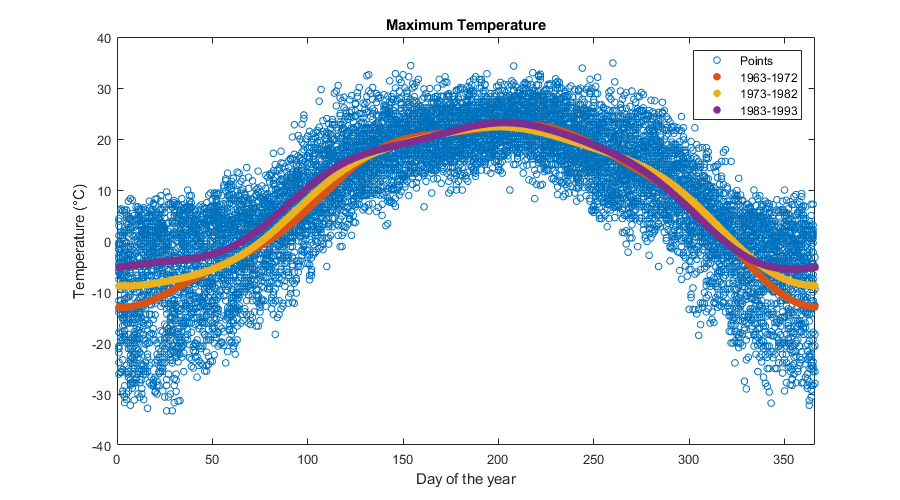

In [12]:
set(0,'DefaultLineMarkerSize',5)

figure;
h([1 2 3 4]) = plot(day_vec,max_temp,'o',day1,max_mod1,'o',...
    day2,max_mod2,'o',day3,max_mod3,'o');
legend(h([1 2 3 4]),'Points','1963-1972','1973-1982','1983-1993');
set(h(2:4), {'MarkerFaceColor'}, get(h(2:4), 'Color'));
xlim([0 366])
title('Maximum Temperature')
xlabel('Day of the year'); ylabel('Temperature (Â°C)');